In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('Training.csv')


# 'fluid_overload' 都為0，Unnamed: 133 都 NA
data = data.drop(['fluid_overload','Unnamed: 133'],axis=1)

#刪除 相關係數=1.0
data = data.drop(['throat_irritation','redness_of_eyes','sinus_pressure','runny_nose','enlarged_thyroid','enlarged_thyroid',
                  'brittle_nails','congestion','increased_appetite','receiving_blood_transfusion','coma','slurred_speech']
                 ,axis=1)
#刪除 相關係數=0.9
data = data.drop(['weight_gain','pain_during_bowel_movements','pain_in_anal_region','bloody_stool','cramps','bruising','swollen_legs',
                 'cold_hands_and_feets','puffy_face_and_eyes','anxiety','knee_pain','spinning_movements','bladder_discomfort',
                  'passage_of_gases','weakness_of_one_body_side','toxic_look_(typhos)','mood_swings','irregular_sugar_level',
                  'yellow_urine','acute_liver_failure','swelling_of_stomach','distention_of_abdomen', 'history_of_alcohol_consumption',
                  'blister','red_sore_around_nose','small_dents_in_nails','silver_like_dusting','swollen_blood_vessels',
                  'drying_and_tingling_lips','swelling_joints','skin_peeling'],axis=1)
#刪除 0.9 以上
data = data.drop(['patches_in_throat','foul_smell_of urine','blackheads'],axis=1)

#sum()
data = data.drop(['pus_filled_pimples','unsteadiness','chest_pain','vomiting'],axis=1)

In [2]:
test=pd.DataFrame()
for i in set(data['prognosis']):
    data1=data[data['prognosis']==i].sample(n=36)
    test=pd.concat([test,data1],axis=0)
X_test=test.drop(['prognosis'],axis=1)
y_test=test['prognosis']
X_train=data.drop(['prognosis'],axis=1)
y_train=data['prognosis']

In [37]:
# test=data.sample(n=1476)
# data=data.drop(test.index,axis=0)
# X_test=test.drop(['prognosis'],axis=1)
# y_test=test['prognosis']
# X_train=data.drop(['prognosis'],axis=1)
# y_train=data['prognosis']

In [38]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# # 假設X是你的特徵矩陣，y_encoded是編碼後的目標變量
# X = data.drop('prognosis', axis=1)  # 'target'是目標變量列名，如果不同請更改
# y = data['prognosis']

# # 初始化LabelEncoder
# label_encoder = LabelEncoder()

# # 擬合並轉換目標變量
# y_encoded = label_encoder.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
import time
time1=time.time()
clf = DecisionTreeClassifier(max_depth=53)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')                          # 因是多分類須加參數 'weighted' 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('決策樹：')
print("Accuracy :{}".format(accuracy))
print("Precision:{}".format(precision))
print("Recall   :{}".format(recall))
print("F1-Score :{}".format(f1))
time2=time.time()
time3=time2-time1
print(time3)

決策樹：
Accuracy :1.0
Precision:1.0
Recall   :1.0
F1-Score :1.0
0.13574862480163574


In [5]:
from sklearn.metrics import classification_report
# 產生分類報告
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        36
                                   AIDS       1.00      1.00      1.00        36
                                   Acne       1.00      1.00      1.00        36
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      1.00      1.00        36
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00        36
                            Common Cold       1.00      1.00      1.00        36
                           

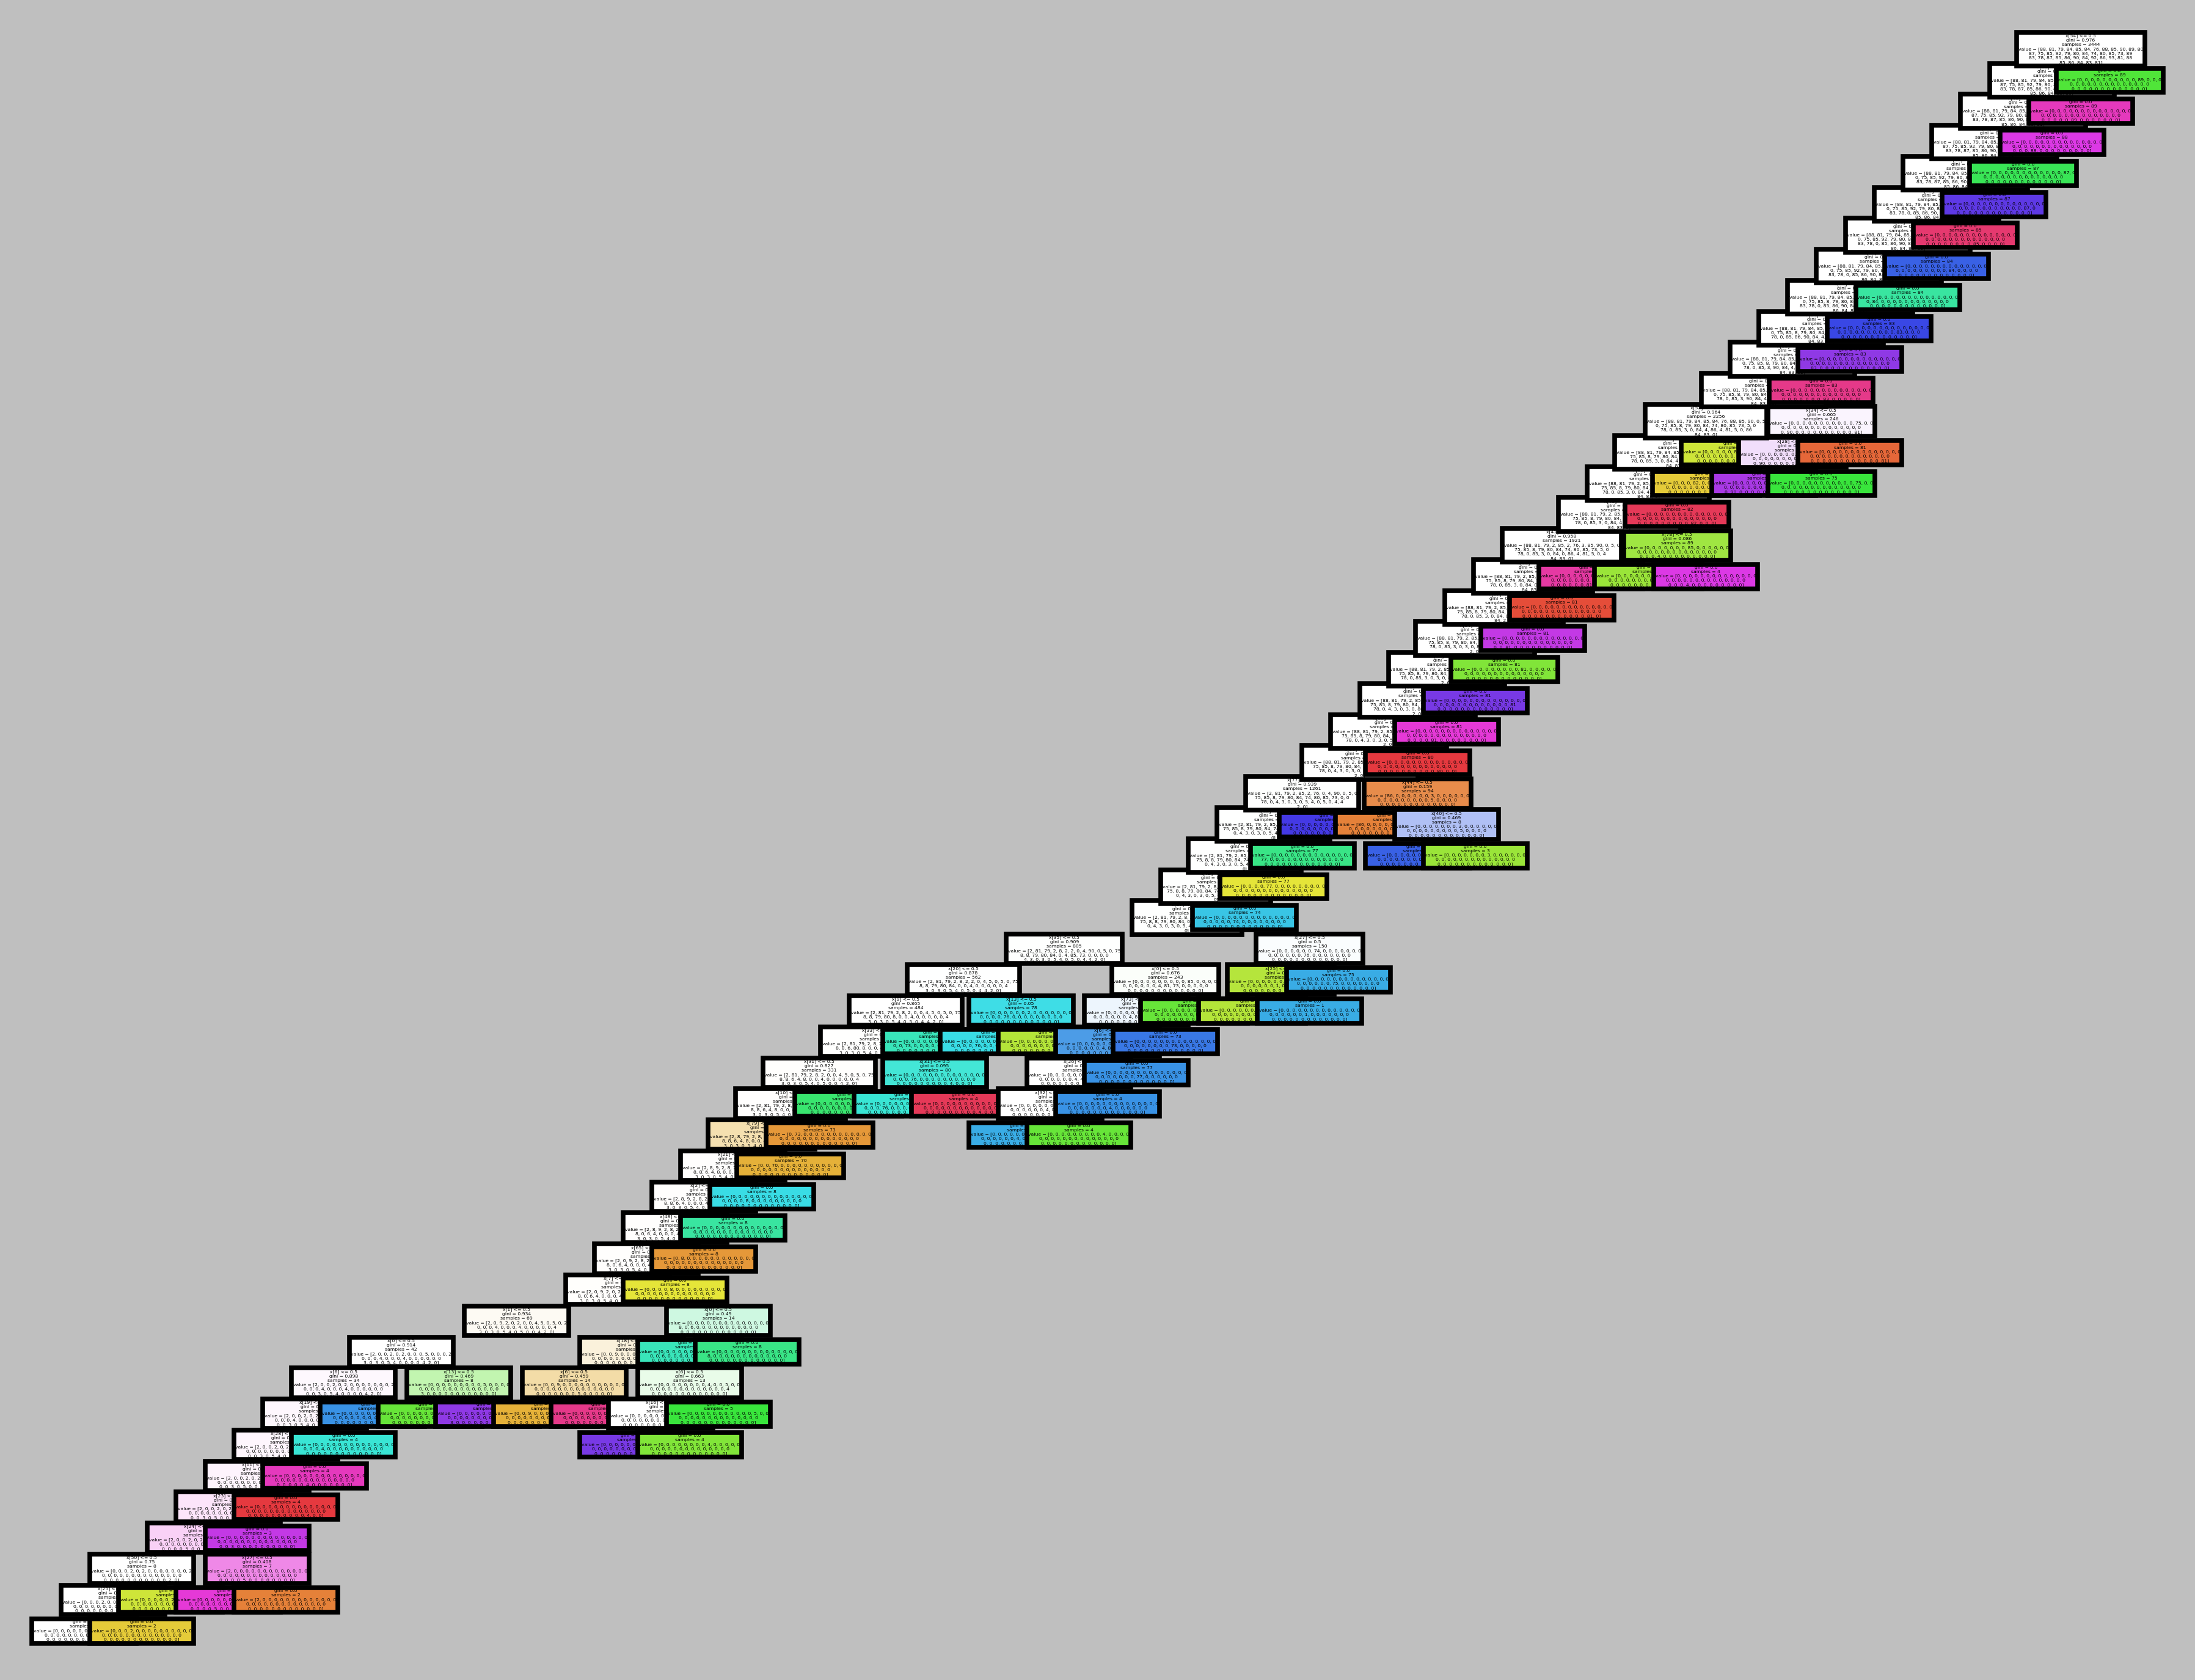

In [14]:
import matplotlib.pyplot as plt
plt.style.use('classic')
from sklearn.tree import plot_tree

plt.figure(dpi=550)
plot_tree(clf, filled=True);

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y_encoded,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# 绘制决策树
graph = graphviz.Source(dot_data)  
graph.render("tree2")  # 保存决策树图形到文件


TypeError: can only concatenate str (not "numpy.int32") to str

In [6]:
from sklearn.model_selection import GridSearchCV

Turning_parameter = {'max_depth':range(1, 60, 1)}
DecisionTree = GridSearchCV(DecisionTreeClassifier(), Turning_parameter)

DecisionTree.fit(X_train, y_train)
print('beat_max_depth:',DecisionTree.best_params_)  
print('beat_max_depth_score:',DecisionTree.score(X_test, y_test)) 


beat_max_depth: {'max_depth': 54}
beat_max_depth_score: 1.0


In [10]:
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.logspace(-4, 4, 9)
train_scores, valid_scores = validation_curve(
    DecisionTreeClassifier(), 
    data.drop(['prognosis'],axis=1), y=data['prognosis'], param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)

In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
valid_scores_mean

array([nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [12]:
import numpy as np
from sklearn.model_selection import learning_curve

size = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, valid_scores = \
    learning_curve(estimator=clf,
                   X=data.drop(['prognosis'],axis=1), y=data['prognosis'],
                   train_sizes=size,
                   cv=10, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

In [13]:
valid_scores_std

array([0.00493279, 0.        , 0.00121951, 0.0026029 , 0.00327734,
       0.00531573, 0.00121951, 0.00243902, 0.        , 0.00447154])

最大平均值 : 1.0
所需的訓練樣本 : 885


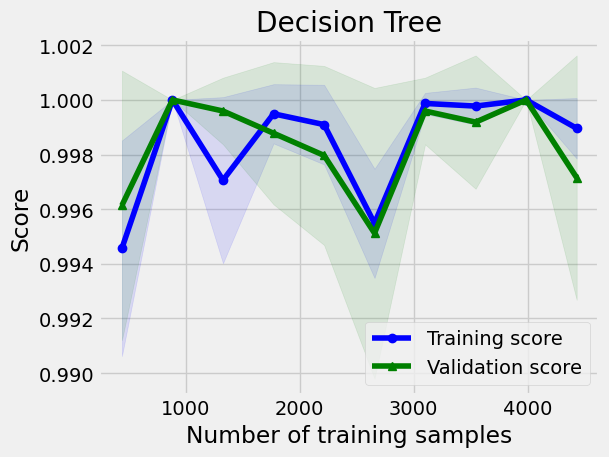

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
plt.style.use('fivethirtyeight')

plt.plot(train_sizes, train_scores_mean, 
         color='blue', marker='o', 
         label='Training score')
plt.fill_between(train_sizes, 
                 train_scores_mean+train_scores_std, 
                 train_scores_mean-train_scores_std, 
                 color='blue', alpha=.1)
plt.plot(train_sizes, valid_scores_mean, 
         color='green', marker='^', 
         label='Validation score')
plt.fill_between(train_sizes, 
                 valid_scores_mean+valid_scores_std, 
                 valid_scores_mean-valid_scores_std, 
                 color='green', alpha=.1)
y_formatter = ScalarFormatter(useOffset=False)
y_formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.title('Decision Tree')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

max_valid_score_index = np.argmax(valid_scores_mean)
max_valid_score = valid_scores_mean[max_valid_score_index]

# 獲取對應的訓練集大小
optimal_train_size = train_sizes[max_valid_score_index]

# 打印結果
print(f"最大平均值 : {max_valid_score}")
print(f"所需的訓練樣本 : {optimal_train_size}")

In [24]:
max_valid_score_index = np.argmax(valid_scores_mean)
max_valid_score = valid_scores_mean[max_valid_score_index]

# 獲取對應的訓練集大小
optimal_train_size = train_sizes[max_valid_score_index]

# 打印結果
print(f"最大平均驗證分數為: {max_valid_score}")
print(f"對應的訓練集大小（即'y'的數量）為: {optimal_train_size}")

最大平均驗證分數為: 1.0
對應的訓練集大小（即'y'的數量）為: 2479


最大平均值 : 1.0
所需的訓練樣本 : 2479


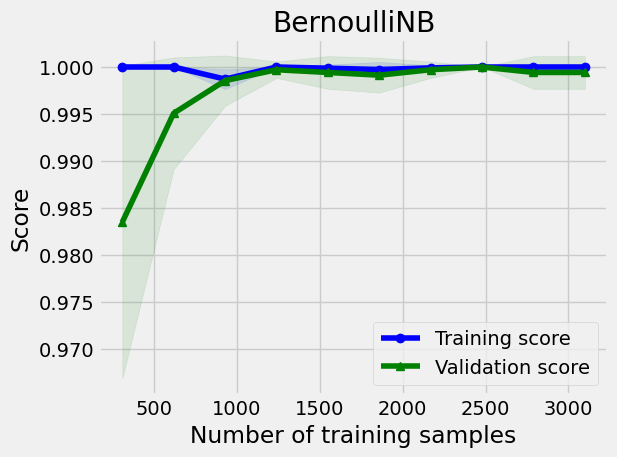

In [25]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(train_sizes, train_scores_mean, 
         color='blue', marker='o', 
         label='Training score')
plt.fill_between(train_sizes, 
                 train_scores_mean+train_scores_std, 
                 train_scores_mean-train_scores_std, 
                 color='blue', alpha=.1)
plt.plot(train_sizes, valid_scores_mean, 
         color='green', marker='^', 
         label='Validation score')
plt.fill_between(train_sizes, 
                 valid_scores_mean+valid_scores_std, 
                 valid_scores_mean-valid_scores_std, 
                 color='green', alpha=.1)
plt.title('BernoulliNB')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()
max_valid_score_index = np.argmax(valid_scores_mean)
max_valid_score = valid_scores_mean[max_valid_score_index]

# 獲取對應的訓練集大小
optimal_train_size = train_sizes[max_valid_score_index]

# 打印結果
print(f"最大平均值 : {max_valid_score}")
print(f"所需的訓練樣本 : {optimal_train_size}")